# Contents

### 1. Prepare for analysis (import packages and set working directory)
### 2. Read in and pre-process data


### 2A. Pre-processing before clustering (optional)
#### 2A.1. Dimensionality reduction (feature extraction) using UMAP


### 3. Clustering
#### 3A. DBSCAN clustering
#### 3B. Hierarchical (agglomerative) clustering

### 4. Visualization
#### 4.1 Cluster heatmap

## 1 - Prepare to work with data

### 1.1 - Import Packages

In [45]:
import os  # <- package used to work with system filepaths
import pandas as pd  # <- package used to import and organize data
import numpy as np  # <- package used to import and organize data
import math
import seaborn as sns  # <- package used to plot graphs
from matplotlib import pyplot as plt  # <- another package used to plot graphs
from itertools import cycle  # <- package used to iterate down rows
from ipywidgets import widgets  # <- widget tool to generate button
from IPython.display import display  # <- displays button
from tkinter import Tk, filedialog  # <- Tkinter is a GUI package
from tqdm.notebook import tqdm
import pingouin as pg
from pingouin import ttest
import scipy
from scipy.stats import ttest_ind
import sklearn
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

# Dimension reduction and clustering libraries
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
import umap

pd.set_option('display.max_columns', 50)
print("done step 1")

done step 1


In [16]:
import sys
!{sys.executable} -m pip install umap-learn

     -------------------------------------- 85.7/85.7 kB 967.6 kB/s eta 0:00:00
     ---------------------------------------- 56.8/56.8 kB 2.9 MB/s eta 0:00:00


### 1.2 - Set working directory to where the CSV file with experiment data is


In [29]:
os.getcwd()
os.chdir('C:\\Users\\chris\\Desktop\\Rankin_Lab\\valid_data')

## 2 - Read in and pre-process data


### 2A - Dimensionality reduction (feature extraction) using UMAP

In [127]:
MergedDopaminergicNeurons_scaled_df = pd.read_csv('MergedDopaminergicNeurons_scaled_df.csv')
MergedDopaminergicNeurons_minusGenotype_scaled_df = MergedDopaminergicNeurons_scaled_df.drop(columns=['Genotype'])

clusterable_embedding = umap.UMAP(
    n_neighbors=5, # default value; larger n_neighbors number is better for the purposes of dimension reduction
    min_dist=0.0,
    n_components=2, # embedding will be projected on a 2-dimensional space for visualization purposes
    random_state=42, #set.seed
).fit_transform(MergedDopaminergicNeurons_minusGenotype_scaled_df)

C:\Users\chris\anaconda3\lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



## 3 - Clustering

### 3A - MeanShift clustering

In [191]:
from sklearn.cluster import MeanShift

# Instantiate MeanShift clustering
meanshift = MeanShift()

# Fit MeanShift clustering to the UMAP-transformed data
meanshift.fit(clusterable_embedding)

# Get the labels assigned by MeanShift clustering
cluster_labels = meanshift.labels_
cluster_centers = meanshift.cluster_centers_

cluster_labels_unique = np.unique(cluster_labels)
n_clusters_ = len(cluster_labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# Add the genotype information back to the data points
ClusteredMergedDopaminergicNeurons_scaled_df = MergedDopaminergicNeurons_scaled_df.copy()
ClusteredMergedDopaminergicNeurons_scaled_df['Cluster'] = cluster_labels
ClusteredMergedDopaminergicNeurons_scaled_df = ClusteredMergedDopaminergicNeurons_scaled_df.sort_values(by='Cluster')

ClusteredMergedDopaminergicNeurons_scaled_df.to_csv('C:\\Users\\chris\\Desktop\\Rankin_Lab\\valid_data\\ClusteredMergedDopaminergicNeurons_scaled_df.csv', index=True)
print(ClusteredMergedDopaminergicNeurons_scaled_df)
# Now data_with_genotype contains the genotype column along with the cluster labels assigned by MeanShift clustering

number of estimated clusters : 3
             Genotype    length   midline     width  morphwidth      area  \
0        cat-2(e1112)  0.749425  1.305501  2.128897    1.869969  1.476677   
14      mbr-1(tm1235)  0.811570  0.834779  0.366540    0.470751  0.772039   
13      mbr-1(qa5901)  1.622093  2.014835  1.801180    1.792549  2.046348   
12       lfe-2(sy326) -0.803792 -0.997563 -0.789128    0.221242 -0.561922   
10  exp-2(sa26ad1426)  0.170790  0.464570  0.896111    1.392430  0.776788   
17    sipa-1(tm11702) -0.262359 -0.281299  0.012983    0.802887  0.220217   
1      catp-7(tm4438)  0.793353  0.650762  0.186369   -0.160586  0.334921   
5      cpr-6(tm12210)  0.702888  0.573031  0.260175    0.376550  0.589157   
6       cpr-8(ok2956) -1.044837 -1.276644 -1.206996   -1.417061 -1.538651   
7      djr-1.1(tm918) -1.226943 -1.530899 -1.783153   -2.085289 -1.644756   
9      djr-1.2(tm951)  0.433269 -0.319474 -1.638986   -0.620473 -0.213204   
11      kvs-5(tm6152)  0.187384 -0.019837 -

### MeanShift clustering visualization

<IPython.core.display.Javascript object>


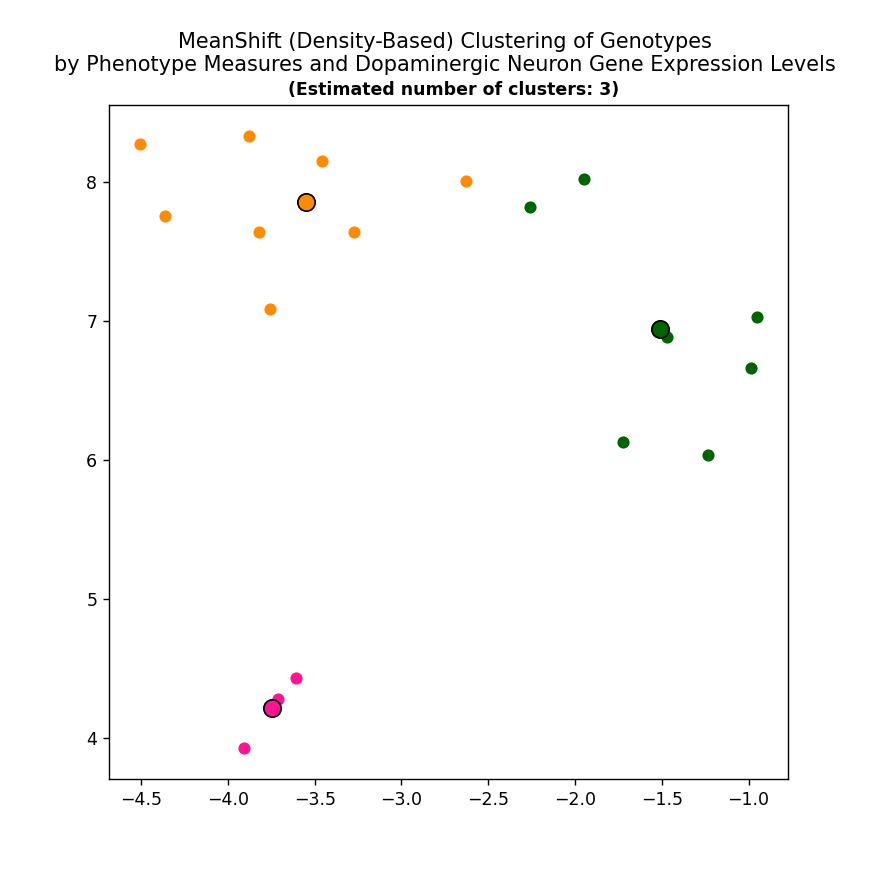

C:\Users\chris\AppData\Local\Temp\ipykernel_35292\3519093060.py:22: UserWarning:

Matplotlib is currently using nbAgg, which is a non-GUI backend, so cannot show the figure.



In [178]:
plt.figure(figsize=(7, 7))

colors = ["#FF8C00", "#006400", "#FF1493"]
markers = ["o", "o", "o"]

for k, col in zip(range(n_clusters_), colors):
    my_members = cluster_labels == k
    cluster_center = cluster_centers[k]
    plt.plot(clusterable_embedding[my_members, 0], clusterable_embedding[my_members, 1], markers[k], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=10,
    )
plt.title("MeanShift (Density-Based) Clustering of Genotypes \nby Phenotype Measures and Dopaminergic Neuron Gene Expression Levels \n")
plt.text(-2.7, 8.63, '(Estimated number of clusters: %d)' % n_clusters_, fontsize=10, color='black', ha='center', weight="bold")
plt.savefig('MergedDopaminergicNeurons_meanshiftclustering.jpg', format = 'jpg', dpi = 450, bbox_inches = "tight")

plt.show()

### 3B - Hierarchical clustering

### 3B.1 - Use StandardScaler() to normalize the distribution of each column (phenotype measure or neuron cell type) to mean = 0 and SD = 1; important step to properly scale data before hierarchical clustering since it calculates based on Euclidean distance

In [66]:
data = pd.read_csv('MergedDopaminergicNeurons_df.csv', index_col='Genotype')
scaler = StandardScaler().fit(data)

# Transform (normalize) data to have mean = 0, SD = 1
scaled_data = scaler.transform(data)

# print(scaled_data.mean(axis=0))
# print(scaled_data.std(axis=0))

# Create a new DataFrame with the transformed data
MergedDopaminergicNeurons_scaled_df = pd.DataFrame(data=scaled_data, 
                                                   columns=MergedDopaminergicNeurons_df.columns, 
                                                   index=MergedDopaminergicNeurons_df.index)

# Save the merged DataFrame as a CSV file to a specific directory
MergedDopaminergicNeurons_scaled_df.to_csv('C:\\Users\\chris\\Desktop\\Rankin_Lab\\valid_data\\MergedDopaminergicNeurons_scaled_df.csv', index=True)

print(MergedDopaminergicNeurons_scaled_df)

                     length   midline     width  morphwidth      area  \
Genotype                                                                
cat-2(e1112)       0.749425  1.305501  2.128897    1.869969  1.476677   
catp-7(tm4438)     0.793353  0.650762  0.186369   -0.160586  0.334921   
catp-7(tm8556)     0.722607  0.706474  0.109481   -0.677416  0.220972   
cpr-4(ok3413)     -0.957153 -0.716039  0.234892   -0.477973 -0.874195   
cpr-5(ok2344)     -1.978089 -1.616487  0.662516   -0.236906 -1.480820   
cpr-6(tm12210)     0.702888  0.573031  0.260175    0.376550  0.589157   
cpr-8(ok2956)     -1.044837 -1.276644 -1.206996   -1.417061 -1.538651   
djr-1.1(tm918)    -1.226943 -1.530899 -1.783153   -2.085289 -1.644756   
djr-1.2(tm817)     0.169282 -0.112686 -0.805001   -0.110346  0.200677   
djr-1.2(tm951)     0.433269 -0.319474 -1.638986   -0.620473 -0.213204   
exp-2(sa26ad1426)  0.170790  0.464570  0.896111    1.392430  0.776788   
kvs-5(tm6152)      0.187384 -0.019837 -0.207493   -

### 3B.2 - Applying the hierarchical clustering algorithm

In [82]:
from scipy.cluster.hierarchy import linkage, dendrogram
%matplotlib notebook

# Perform agglomerative clustering, testing different linkage methods
complete_clustering = linkage(MergedDopaminergicNeurons_scaled_df, method="complete", metric="euclidean")
average_clustering = linkage(MergedDopaminergicNeurons_scaled_df, method="average", metric="euclidean")
single_clustering = linkage(MergedDopaminergicNeurons_scaled_df, method="single", metric="euclidean")
ward_clustering = linkage(MergedDopaminergicNeurons_scaled_df, method='ward')

In [179]:
plt.figure(figsize=(7, 7))  # Adjust the figure size as needed
dendrogram(complete_clustering, orientation = 'left',
          labels=MergedDopaminergicNeurons_scaled_df.index)
plt.xticks(rotation=90, fontsize = 7)
plt.xlabel('Genotype')
plt.ylabel('Distance')
plt.title('Complete Linkage Hierarchical Clustering by of Genotypes \nby Phenotype Measures and Dopaminergic Neuron Gene Expression Levels', fontsize = 12)
plt.savefig('MergedDopaminergicNeurons_completehierarchicalclustering.jpg', format = 'jpg', dpi = 450, bbox_inches = "tight")
plt.show()


<IPython.core.display.Javascript object>

C:\Users\chris\AppData\Local\Temp\ipykernel_35292\235433230.py:9: UserWarning:

Matplotlib is currently using nbAgg, which is a non-GUI backend, so cannot show the figure.



<IPython.core.display.Javascript object>


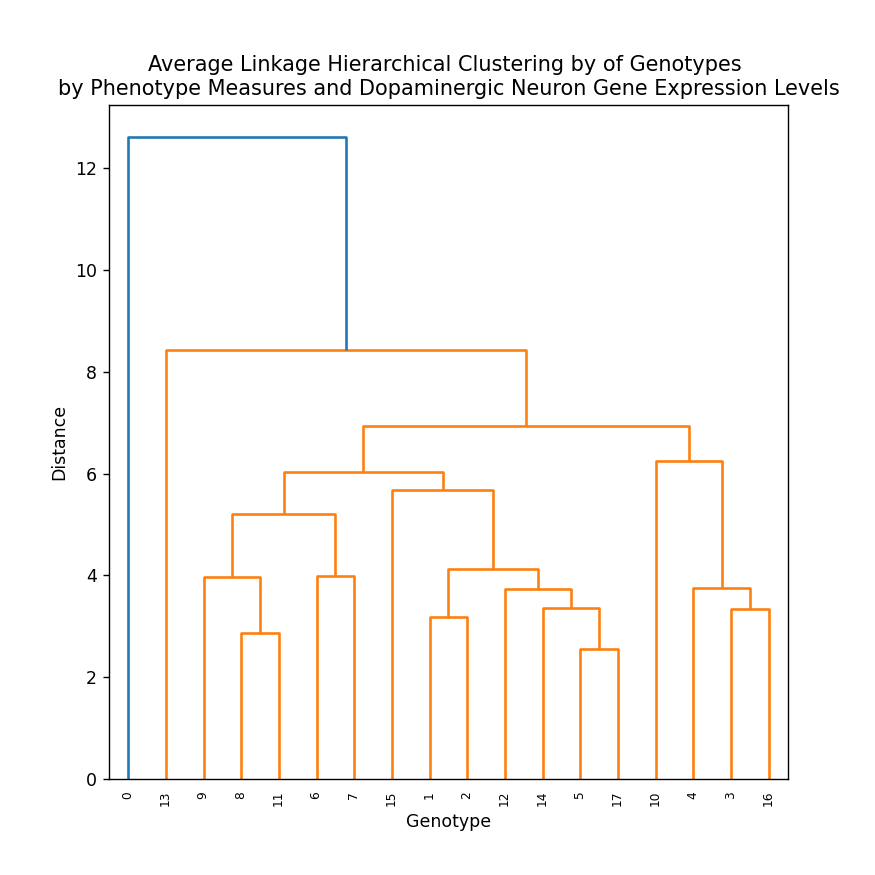

C:\Users\chris\AppData\Local\Temp\ipykernel_35292\1273405724.py:9: UserWarning:

Matplotlib is currently using nbAgg, which is a non-GUI backend, so cannot show the figure.



In [180]:
plt.figure(figsize=(7, 7))  # Adjust the figure size as needed
dendrogram(average_clustering, orientation = 'top',
          labels=MergedDopaminergicNeurons_scaled_df.index)
plt.xticks(rotation=90, fontsize = 7)
plt.xlabel('Genotype')
plt.ylabel('Distance')
plt.title('Average Linkage Hierarchical Clustering by of Genotypes \nby Phenotype Measures and Dopaminergic Neuron Gene Expression Levels', fontsize = 12)
plt.savefig('MergedDopaminergicNeurons_averagehierarchicalclustering.jpg', format = 'jpg', dpi = 450, bbox_inches = "tight")
plt.show()

<IPython.core.display.Javascript object>


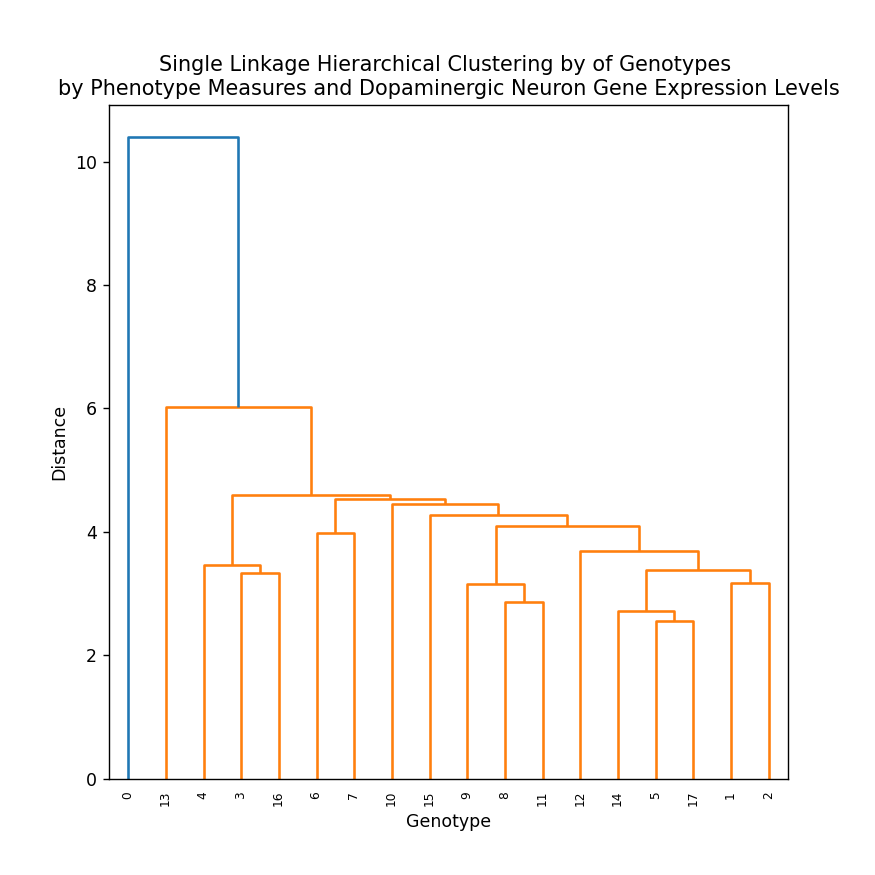

C:\Users\chris\AppData\Local\Temp\ipykernel_35292\418731731.py:9: UserWarning:

Matplotlib is currently using nbAgg, which is a non-GUI backend, so cannot show the figure.



In [181]:
plt.figure(figsize=(7, 7))  # Adjust the figure size as needed
dendrogram(single_clustering, orientation = 'top',
          labels=MergedDopaminergicNeurons_scaled_df.index)
plt.xticks(rotation=90, fontsize = 7)
plt.xlabel('Genotype')
plt.ylabel('Distance')
plt.title('Single Linkage Hierarchical Clustering by of Genotypes \nby Phenotype Measures and Dopaminergic Neuron Gene Expression Levels', fontsize = 12)
plt.savefig('MergedDopaminergicNeurons_singlehierarchicalclustering.jpg', format = 'jpg', dpi = 450, bbox_inches = "tight")
plt.show()

<IPython.core.display.Javascript object>


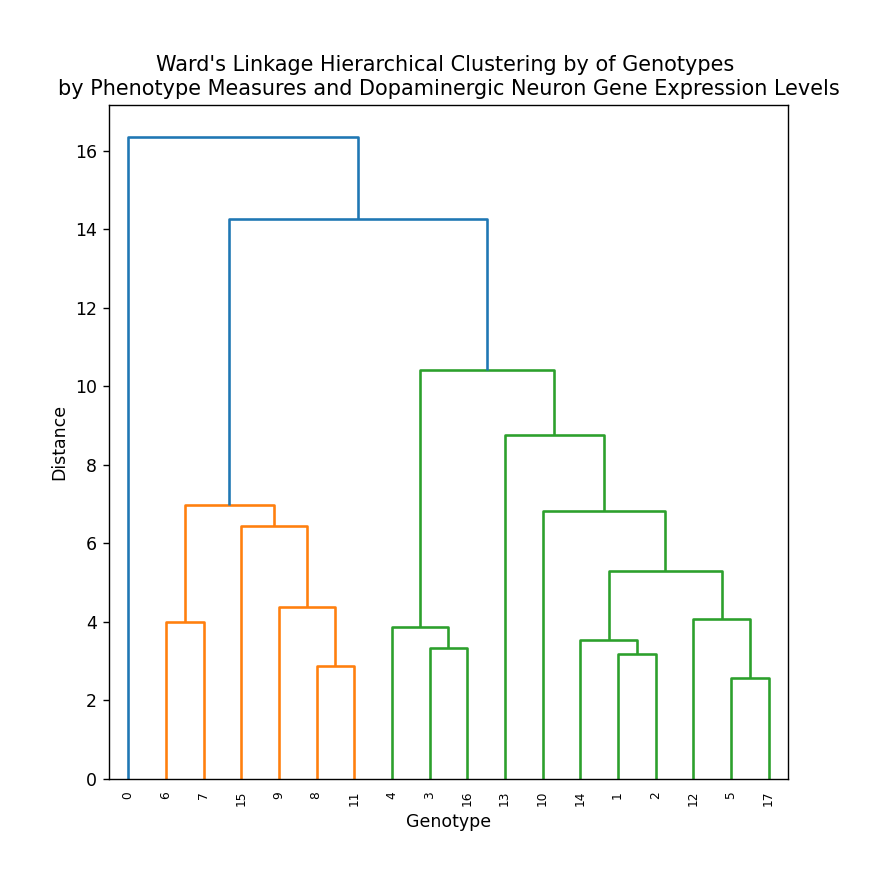

C:\Users\chris\AppData\Local\Temp\ipykernel_35292\1090075098.py:9: UserWarning:

Matplotlib is currently using nbAgg, which is a non-GUI backend, so cannot show the figure.



In [182]:
plt.figure(figsize=(7, 7))  # Adjust the figure size as needed
dendrogram(ward_clustering, orientation = 'top',
          labels=MergedDopaminergicNeurons_scaled_df.index)
plt.xticks(rotation=90, fontsize = 7)
plt.xlabel('Genotype')
plt.ylabel('Distance')
plt.title('Ward\'s Linkage Hierarchical Clustering by of Genotypes \nby Phenotype Measures and Dopaminergic Neuron Gene Expression Levels', fontsize = 12)
plt.savefig('MergedDopaminergicNeurons_wardhierarchicalclustering.jpg', format = 'jpg', dpi = 450, bbox_inches = "tight")
plt.show()